# Week 2 - Exercise


## A few words about modules and functions
- Module: a group of highly related classes/functions. (Usually a something.py file)
    - import mymodule - load the module
    - usage: mymodule.myfunction(); mymodule.myclass()
- from mymodule import myclass – load the myclass
    - Usage of class defined in the module: myclass()
- from mymodule import * - load everything
- the difference is the namespace (like in c++)
- modules used here:
    - the SeqIO module of Biopython helps to read sequences easily
    - numpy module can do the math
    - matplotlib makes nice plots, similar to Matlab
- functions can be implemented with the "def" command using only indenting (tabs) to mark its beginning and end
- functions can be called later by their name, giving them the appropriate parameters


## About NumPy
- Scientific module for python: (https://numpy.org/devdocs/user/quickstart.html)
Main type is the multidimensional array
- Table of elements of same type (usually numbers). Basically matrices
    - Axes: „dimensions”
    - Rank: number of dimensions

In [1]:
# installing biopython
!pip install biopython


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 28.8 MB/s eta 0:00:00


# Dot plot generating code

In [34]:
from Bio import SeqIO
from copy import deepcopy
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
import requests



def dotplot(seq1name, seq2name=None,  cutoff=15, wordsize=20, isreversecompl=False):
    '''
    Draw a dotplot of two sequences. If isreversecompl=True, then
    the first sequence is compared to it's reverse complement.

    :param seq1name:       path to the first sequence.
                           The sequence file is expected to be a valid fasta file.
    :param seq2name:       path to the second sequence.
                           The sequence file is expected to be a valid fasta file.
    :param cutoff:         the treshold defining whether a dot should be plotted
    :param wordsize:       window size
    :param isreversecompl: If True, then the function plots the sequence 1 against
                           it's reverse complement. Default is False. Note if it is
                           False, then seqname2 is ignored.
    '''
    # scoring scheme
    match_score = 5
    mis_match_score = -4

    # read in the fasta files
    for seq1obj in SeqIO.parse(seq1name, "fasta"):
        print(seq1obj.id, ": ", seq1obj.seq)

    if not isreversecompl:
        for seq2obj in SeqIO.parse(seq2name, "fasta"):
            print(seq2obj.id, ": ", seq2obj.seq)

    if isreversecompl: # make the reverse complement of the sequence to find stem loops
        seq2obj=deepcopy(seq1obj)
        seq2obj.seq=seq1obj.seq.reverse_complement()
        seq2obj.id=seq1obj.id+' reverse complement'
        print(seq2obj.id, ": ", seq2obj.seq)

    seq1=seq1obj.seq.lower()
    seq2=seq2obj.seq.lower()
    nucleotide_list=('c', 'g', 't', 'a')
    matrix=np.zeros((len(seq1), len(seq2)), dtype=int) # store the dots here
    matrix2=np.zeros((len(seq1), len(seq2)), dtype=int) # store the match values here
    for i in range(0,len(seq1)-wordsize+1):
        for j in range(0, len(seq2)-wordsize+1):
            score=0
            for k in range(0, wordsize):
                if seq1[i+k]==seq2[j+k] and seq1[i+k] in nucleotide_list and seq2[j+k] in nucleotide_list: #if there is a match and it is a nucleotide
                    score+=match_score # simplest scoring scheme: match=+1 mismatch=0
                else:
                    score+=mis_match_score
            if score >= cutoff:
                matrix[i+int(wordsize/2),j+int(wordsize/2)]=1 # dot in the middle of the word if the score is not lower then the cut-off score
            matrix2[i + int(wordsize / 2), j + int(wordsize / 2)] = score # store the scores

    # visualization:
    # dotplot itself
    plt.figure(1)
    plt.pcolor(matrix, cmap=plt.cm.binary)
    plt.xlabel(seq2obj.id)
    plt.ylabel(seq1obj.id)
    plt.title('Dotplot: cut-off score= ' + str(cutoff) + ', word size=' + str(wordsize))
    plt.colorbar()
    #heatmap
    plt.figure(2)
    plt.pcolor(matrix2)
    plt.xlabel(seq2obj.id)
    plt.ylabel(seq1obj.id)
    plt.title('Dotplot: cut-off score= ' + str(cutoff) + ', word size=' + str(wordsize))
    plt.colorbar()

    plt.show()


In [3]:
# Download sequence 1 from GitHub
sequence_1_url = 'https://raw.githubusercontent.com/nbrg-ppcu/Introduction_to_bioinfo/dev/data/dot-hydro-plot/task_seq1.fasta'
sequence_1 = 'task_seq1.fasta'

response = requests.get(sequence_1_url)
with open(sequence_1, 'wb') as file:
    file.write(response.content)

# Download sequence 2 from GitHub
sequence_2_url = 'https://raw.githubusercontent.com/nbrg-ppcu/Introduction_to_bioinfo/dev/data/dot-hydro-plot/task_seq2.fasta'
sequence_2 = 'task_seq2.fasta'

response = requests.get(sequence_2_url)
with open(sequence_2, 'wb') as file:
    file.write(response.content)

# Download sequence 3 from GitHub
sequence_3_url = 'https://raw.githubusercontent.com/nbrg-ppcu/Introduction_to_bioinfo/dev/data/dot-hydro-plot/task_seq3.fasta'
sequence_3 = 'task_seq3.fasta'

response = requests.get(sequence_3_url)
with open(sequence_3, 'wb') as file:
    file.write(response.content)

# Download sequence 4 from GitHub
sequence_4_url = 'https://raw.githubusercontent.com/nbrg-ppcu/Introduction_to_bioinfo/dev/data/dot-hydro-plot/task_seq4.fasta'
sequence_4 = 'task_seq4.fasta'

response = requests.get(sequence_4_url)
with open(sequence_4, 'wb') as file:
    file.write(response.content)

# Now you can use the sequences as needed, for example in a dotplot or other analysis
# dotplot(sequence_1, sequence_2, ...) or other functions


### Using the dotplot function:
- you can run the program by calling the function
    - the 5th parameter is TRUE if we search stem loops, FALSE otherwise (default is FALSE)

sequence_1 :  ACCTGGAAGAAGCCCTGCAGAGGCCAGTGGCATCTGACTTTGAGCCCCAGGGTCTCAGCGAAGCAGCTCGATGGAACTCCAAGGAAAACCTTCTTGCTGGGCCCAGTGAAAATGACCCCAACCTTTTTGTGGCACTCTATGATTTTGTGGCCAGTGGAGATAACACTCTCAGCATCACTAAAGGTGAAAAGCTCCGGGTCTTGGGTTATAATCACAATGGGGAATGGTGTGAAGCCCAAACGAAAAATGGCCAAGGATGGGTCCCAAGCAACTACATCACCCCCGTCAACAGCCTGGAGAAACATTCCTGGTATCATGGCCCTGTATCTCGGAATGCTGCTGAGTATCTG
sequence_2 :  AAGAAGGCCAAGCTTGCCTGCCCTGCATTTTATCAAAGGAGCAGGGAAGAAGGAATCATCGAGGCATGGGGGTCCACACTGCAATGTTTTTGTGGAACATGAAGCCCTTCAGCGGCCAGTAGCATCTGACTTTGAGCCTCAGGGTCTGAGTGAAGCCGCTCGTTGGAACTCCAAGGAAAACCTTCTCGCTGGACCCAGTGAAAATGACCCCAACCTTTTCGTTGCACTGTATGATTTTGTGGCCAGTGGAGATAACACTCTAAGCATAACTAAAGGTGAAAAGCTCCGGGTCTTAGGCTATAATGAAGCCCAAACCAAAAATGGCCAAGGCTGGGTCCCAAGCAACTACATCACGCCAGTCAAC


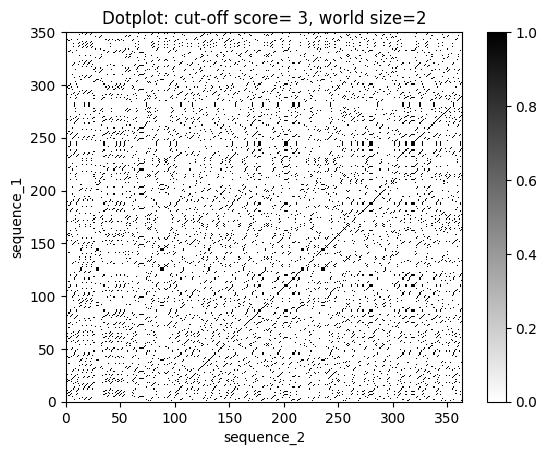

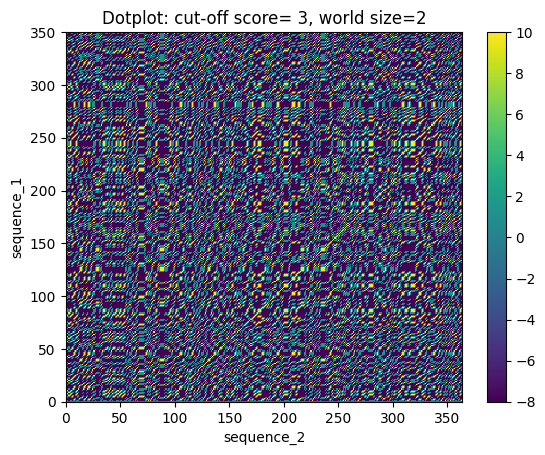

sequence_1 :  ACCTGGAAGAAGCCCTGCAGAGGCCAGTGGCATCTGACTTTGAGCCCCAGGGTCTCAGCGAAGCAGCTCGATGGAACTCCAAGGAAAACCTTCTTGCTGGGCCCAGTGAAAATGACCCCAACCTTTTTGTGGCACTCTATGATTTTGTGGCCAGTGGAGATAACACTCTCAGCATCACTAAAGGTGAAAAGCTCCGGGTCTTGGGTTATAATCACAATGGGGAATGGTGTGAAGCCCAAACGAAAAATGGCCAAGGATGGGTCCCAAGCAACTACATCACCCCCGTCAACAGCCTGGAGAAACATTCCTGGTATCATGGCCCTGTATCTCGGAATGCTGCTGAGTATCTG
sequence_1 :  ACCTGGAAGAAGCCCTGCAGAGGCCAGTGGCATCTGACTTTGAGCCCCAGGGTCTCAGCGAAGCAGCTCGATGGAACTCCAAGGAAAACCTTCTTGCTGGGCCCAGTGAAAATGACCCCAACCTTTTTGTGGCACTCTATGATTTTGTGGCCAGTGGAGATAACACTCTCAGCATCACTAAAGGTGAAAAGCTCCGGGTCTTGGGTTATAATCACAATGGGGAATGGTGTGAAGCCCAAACGAAAAATGGCCAAGGATGGGTCCCAAGCAACTACATCACCCCCGTCAACAGCCTGGAGAAACATTCCTGGTATCATGGCCCTGTATCTCGGAATGCTGCTGAGTATCTG


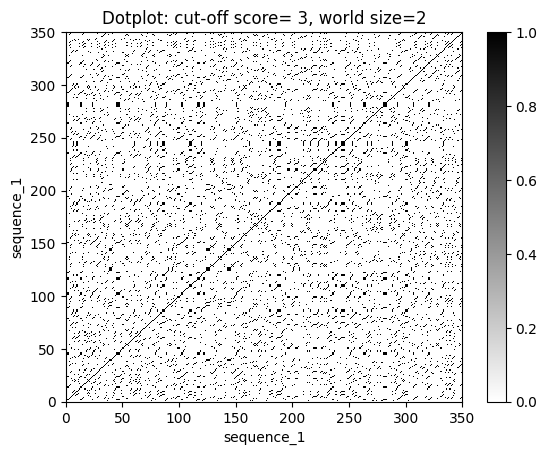

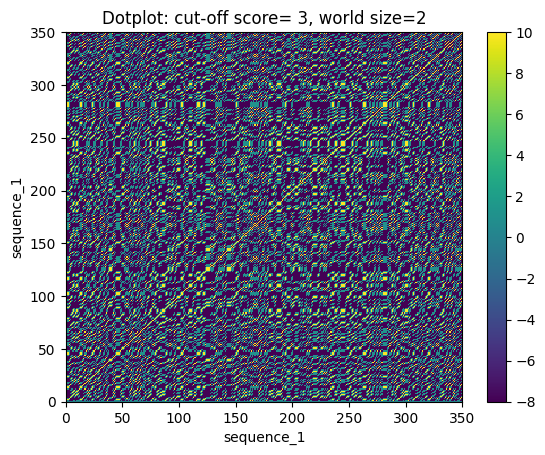

sequence_1 :  ACCTGGAAGAAGCCCTGCAGAGGCCAGTGGCATCTGACTTTGAGCCCCAGGGTCTCAGCGAAGCAGCTCGATGGAACTCCAAGGAAAACCTTCTTGCTGGGCCCAGTGAAAATGACCCCAACCTTTTTGTGGCACTCTATGATTTTGTGGCCAGTGGAGATAACACTCTCAGCATCACTAAAGGTGAAAAGCTCCGGGTCTTGGGTTATAATCACAATGGGGAATGGTGTGAAGCCCAAACGAAAAATGGCCAAGGATGGGTCCCAAGCAACTACATCACCCCCGTCAACAGCCTGGAGAAACATTCCTGGTATCATGGCCCTGTATCTCGGAATGCTGCTGAGTATCTG
sequence_1 reverse complement :  CAGATACTCAGCAGCATTCCGAGATACAGGGCCATGATACCAGGAATGTTTCTCCAGGCTGTTGACGGGGGTGATGTAGTTGCTTGGGACCCATCCTTGGCCATTTTTCGTTTGGGCTTCACACCATTCCCCATTGTGATTATAACCCAAGACCCGGAGCTTTTCACCTTTAGTGATGCTGAGAGTGTTATCTCCACTGGCCACAAAATCATAGAGTGCCACAAAAAGGTTGGGGTCATTTTCACTGGGCCCAGCAAGAAGGTTTTCCTTGGAGTTCCATCGAGCTGCTTCGCTGAGACCCTGGGGCTCAAAGTCAGATGCCACTGGCCTCTGCAGGGCTTCTTCCAGGT


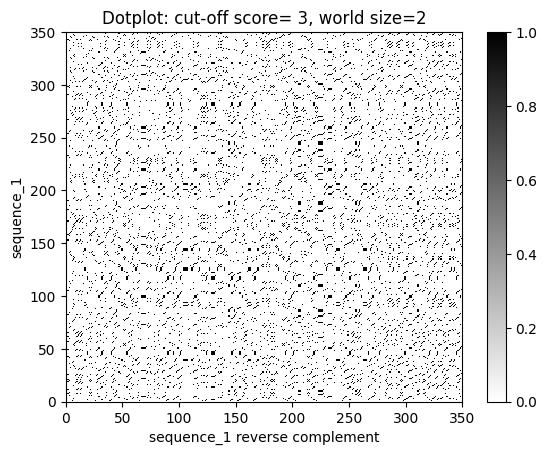

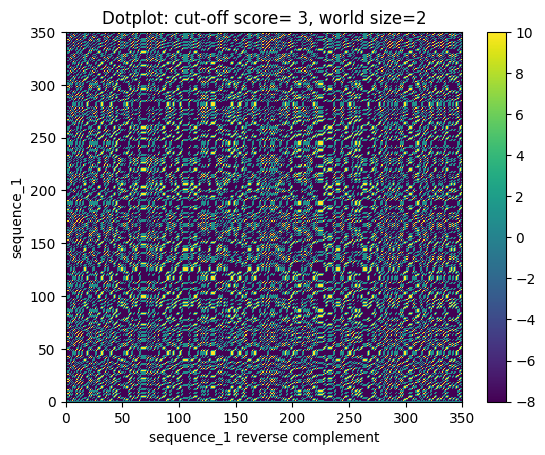

In [4]:
#exampe for the dotplot - comparing the two sequence against eachother
dotplot(sequence_1, sequence_2, cutoff=3, wordsize=2) #change parameters
#example for comparing the sequence to itself (i.e. finding repeats)
dotplot(sequence_1, sequence_1, cutoff=3, wordsize=2, isreversecompl=False)
#example for comparing the sequence to its reverse complement
dotplot(sequence_1, None, cutoff=3, wordsize=2, isreversecompl=True)

# Exercise: Use dotplot function and the sequences (sequence_1, sequence_2, sequence_3, sequence_4) to answer the following questions:

### HINT: try to use the heat map for finding 'the optimal' tresholds
### HINT: modify the window size, and cut-off score parameters to get plots with all the important features, but with minimal noise
### SUBMIT:
- your python code with the parameters,
- the generated plots,
- short explanation of your results (in markdown cells)
  

### 1.: Which are the 2 most similar sequences and why?

###  1. Answer:

sequence_1 :  ACCTGGAAGAAGCCCTGCAGAGGCCAGTGGCATCTGACTTTGAGCCCCAGGGTCTCAGCGAAGCAGCTCGATGGAACTCCAAGGAAAACCTTCTTGCTGGGCCCAGTGAAAATGACCCCAACCTTTTTGTGGCACTCTATGATTTTGTGGCCAGTGGAGATAACACTCTCAGCATCACTAAAGGTGAAAAGCTCCGGGTCTTGGGTTATAATCACAATGGGGAATGGTGTGAAGCCCAAACGAAAAATGGCCAAGGATGGGTCCCAAGCAACTACATCACCCCCGTCAACAGCCTGGAGAAACATTCCTGGTATCATGGCCCTGTATCTCGGAATGCTGCTGAGTATCTG
sequence_4 :  CAGAGGCCAGTGGCATCTGACTTTGAGCAACCAGGGTCTCAGCGAAGCAGCTCGGTGGAACTCCAAGGAAACCTTCTTCCTGGGCCCAGTGAAAATGACCCCAACCTTTTTGTGGCACTCTATGATTGTGTGGCCAGTGGAGATAACACTCTCAGCATCACTAAAGGTGAAAAGCTCCGGGTCTTGGGTTATAATCACAATGGGGAATGGTGTGAAGCCCAAACAGGACTTCTCCTCTGGCCAGTCCAGCCGCGTGTCCCCAAGCCCCACCACCTACCGCATGTTCCGGGACAAAAGCCGCTCTCGCCTTCCCTGGCCCCGCACCACGCAG


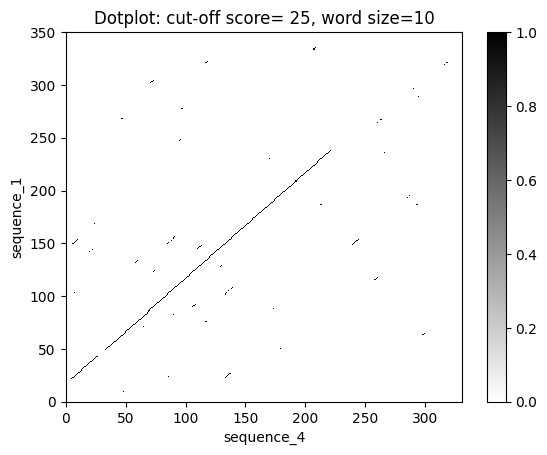

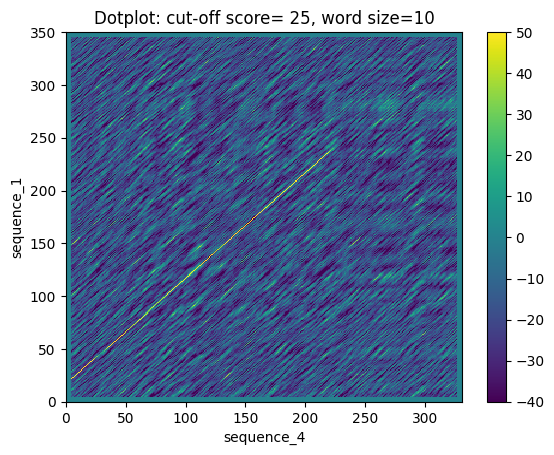

In [64]:
dotplot(sequence_1, sequence_4, cutoff=25, wordsize=10) #change parameters

1 and 4 are the most similar sequenc, since they have the most dots in a single line also along the main diagonal

### 2.: Are there any repeated regions regions in the sequences? In which one(s)? Where are these regions, how many repeats are there?

###  2. Answer:

sequence_3 :  AGCAGGAGAAGCGCCTTACCTGGCCCCGCAGGTCCTACTCCCCCCGGAGTTTTGAGGATTGCGGAGGCGGCTATACCCCGGACGCCTTACCTGGCCCCGCATGCAGCTCCAATGAGAACCTCACCTCCAGGGTGAGGTTCTCATTCGAGGAGGACTTCTCCTCTGGCCAGTCCAGCCGCGTGTCCCCAAGCCCCACCACCTACCGCATGTTCCGGGACAAAAGCCGCTCTCGCCTTACCTGGCCCCGCACCTCGCAGAACT
sequence_3 :  AGCAGGAGAAGCGCCTTACCTGGCCCCGCAGGTCCTACTCCCCCCGGAGTTTTGAGGATTGCGGAGGCGGCTATACCCCGGACGCCTTACCTGGCCCCGCATGCAGCTCCAATGAGAACCTCACCTCCAGGGTGAGGTTCTCATTCGAGGAGGACTTCTCCTCTGGCCAGTCCAGCCGCGTGTCCCCAAGCCCCACCACCTACCGCATGTTCCGGGACAAAAGCCGCTCTCGCCTTACCTGGCCCCGCACCTCGCAGAACT


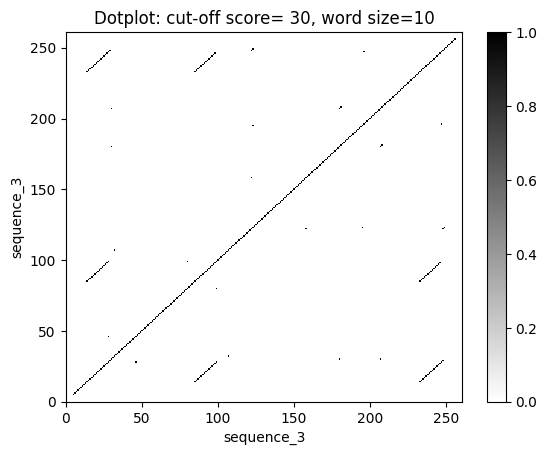

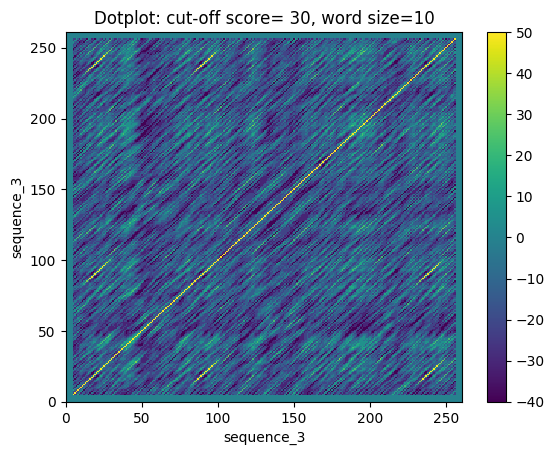

In [41]:
dotplot(sequence_3, sequence_3, cutoff=30, wordsize=10, isreversecompl=False)

Yes there are, in seq3 there seem to be 3 repeated regions. These are more defined here than in other sequences and don't disappear when increasing the cutoff size.

### 3.: Are there any stem loop regions in the sequences? In which one(s)? (Usually nearly perfect match is required in stem loops in order to stabilise their structure.) Where are these regions? What is a stem loop?

###  3. Answer:

sequence_3 :  AGCAGGAGAAGCGCCTTACCTGGCCCCGCAGGTCCTACTCCCCCCGGAGTTTTGAGGATTGCGGAGGCGGCTATACCCCGGACGCCTTACCTGGCCCCGCATGCAGCTCCAATGAGAACCTCACCTCCAGGGTGAGGTTCTCATTCGAGGAGGACTTCTCCTCTGGCCAGTCCAGCCGCGTGTCCCCAAGCCCCACCACCTACCGCATGTTCCGGGACAAAAGCCGCTCTCGCCTTACCTGGCCCCGCACCTCGCAGAACT
sequence_3 reverse complement :  AGTTCTGCGAGGTGCGGGGCCAGGTAAGGCGAGAGCGGCTTTTGTCCCGGAACATGCGGTAGGTGGTGGGGCTTGGGGACACGCGGCTGGACTGGCCAGAGGAGAAGTCCTCCTCGAATGAGAACCTCACCCTGGAGGTGAGGTTCTCATTGGAGCTGCATGCGGGGCCAGGTAAGGCGTCCGGGGTATAGCCGCCTCCGCAATCCTCAAAACTCCGGGGGGAGTAGGACCTGCGGGGCCAGGTAAGGCGCTTCTCCTGCT


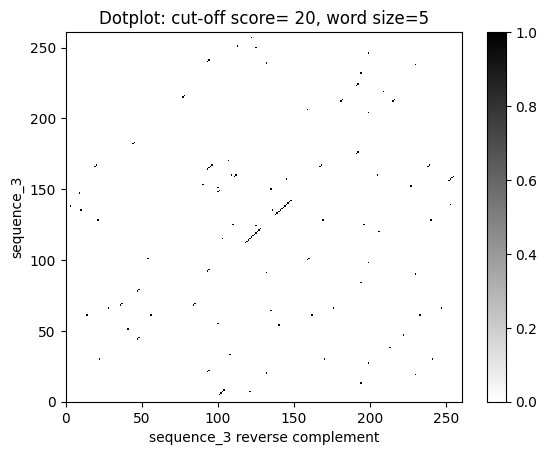

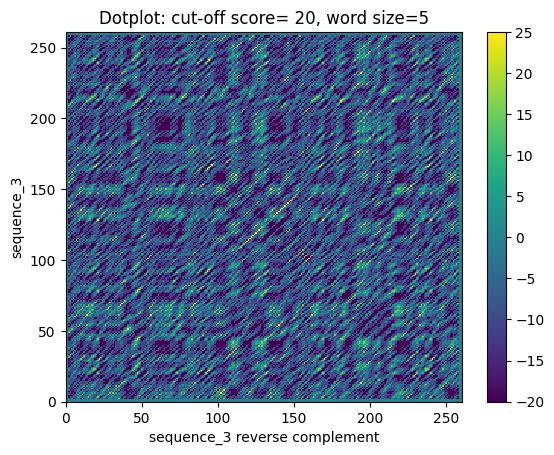

In [50]:
dotplot(sequence_3, None, cutoff=20, wordsize=5, isreversecompl=True)

There is a stem loop in seq3 near the middle of the sequence. A stem loop is a type of secondary structure in single strand DNA or RNA where, complementary nucleotide sequences on the same strand base-pair to form a double-helical "stem," leaving an unpaired loop of nucleotides at one end.

### 4.: How is sequence_4 related to the other sequences? What could be its origin?  

###  4. Answer:

sequence_4 :  CAGAGGCCAGTGGCATCTGACTTTGAGCAACCAGGGTCTCAGCGAAGCAGCTCGGTGGAACTCCAAGGAAACCTTCTTCCTGGGCCCAGTGAAAATGACCCCAACCTTTTTGTGGCACTCTATGATTGTGTGGCCAGTGGAGATAACACTCTCAGCATCACTAAAGGTGAAAAGCTCCGGGTCTTGGGTTATAATCACAATGGGGAATGGTGTGAAGCCCAAACAGGACTTCTCCTCTGGCCAGTCCAGCCGCGTGTCCCCAAGCCCCACCACCTACCGCATGTTCCGGGACAAAAGCCGCTCTCGCCTTCCCTGGCCCCGCACCACGCAG
sequence_1 :  ACCTGGAAGAAGCCCTGCAGAGGCCAGTGGCATCTGACTTTGAGCCCCAGGGTCTCAGCGAAGCAGCTCGATGGAACTCCAAGGAAAACCTTCTTGCTGGGCCCAGTGAAAATGACCCCAACCTTTTTGTGGCACTCTATGATTTTGTGGCCAGTGGAGATAACACTCTCAGCATCACTAAAGGTGAAAAGCTCCGGGTCTTGGGTTATAATCACAATGGGGAATGGTGTGAAGCCCAAACGAAAAATGGCCAAGGATGGGTCCCAAGCAACTACATCACCCCCGTCAACAGCCTGGAGAAACATTCCTGGTATCATGGCCCTGTATCTCGGAATGCTGCTGAGTATCTG


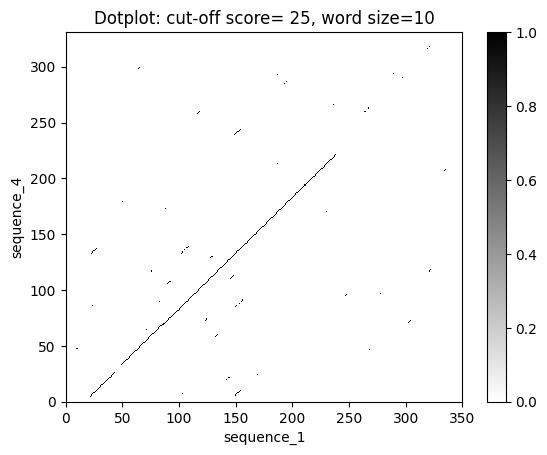

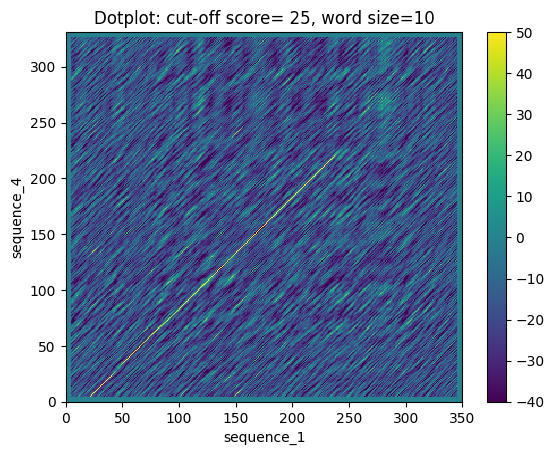

sequence_4 :  CAGAGGCCAGTGGCATCTGACTTTGAGCAACCAGGGTCTCAGCGAAGCAGCTCGGTGGAACTCCAAGGAAACCTTCTTCCTGGGCCCAGTGAAAATGACCCCAACCTTTTTGTGGCACTCTATGATTGTGTGGCCAGTGGAGATAACACTCTCAGCATCACTAAAGGTGAAAAGCTCCGGGTCTTGGGTTATAATCACAATGGGGAATGGTGTGAAGCCCAAACAGGACTTCTCCTCTGGCCAGTCCAGCCGCGTGTCCCCAAGCCCCACCACCTACCGCATGTTCCGGGACAAAAGCCGCTCTCGCCTTCCCTGGCCCCGCACCACGCAG
sequence_3 :  AGCAGGAGAAGCGCCTTACCTGGCCCCGCAGGTCCTACTCCCCCCGGAGTTTTGAGGATTGCGGAGGCGGCTATACCCCGGACGCCTTACCTGGCCCCGCATGCAGCTCCAATGAGAACCTCACCTCCAGGGTGAGGTTCTCATTCGAGGAGGACTTCTCCTCTGGCCAGTCCAGCCGCGTGTCCCCAAGCCCCACCACCTACCGCATGTTCCGGGACAAAAGCCGCTCTCGCCTTACCTGGCCCCGCACCTCGCAGAACT


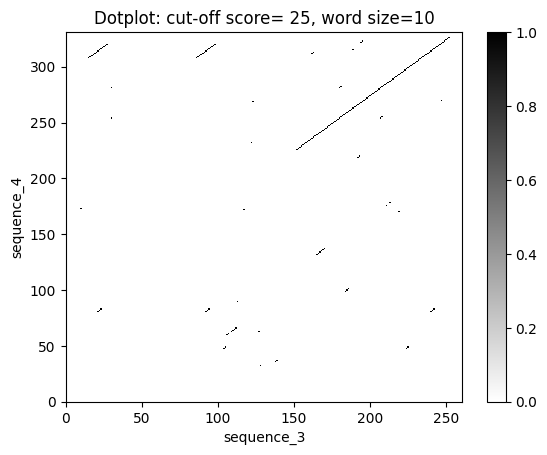

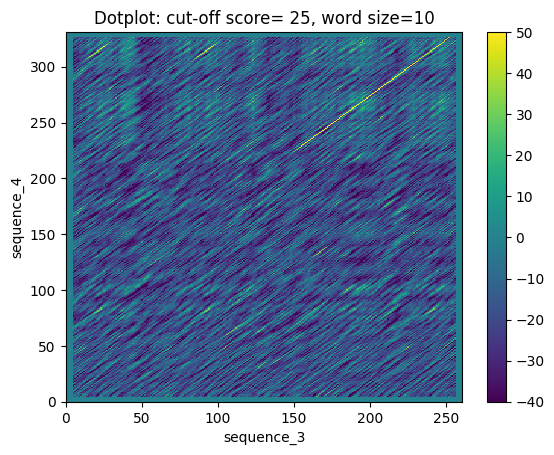

sequence_4 :  CAGAGGCCAGTGGCATCTGACTTTGAGCAACCAGGGTCTCAGCGAAGCAGCTCGGTGGAACTCCAAGGAAACCTTCTTCCTGGGCCCAGTGAAAATGACCCCAACCTTTTTGTGGCACTCTATGATTGTGTGGCCAGTGGAGATAACACTCTCAGCATCACTAAAGGTGAAAAGCTCCGGGTCTTGGGTTATAATCACAATGGGGAATGGTGTGAAGCCCAAACAGGACTTCTCCTCTGGCCAGTCCAGCCGCGTGTCCCCAAGCCCCACCACCTACCGCATGTTCCGGGACAAAAGCCGCTCTCGCCTTCCCTGGCCCCGCACCACGCAG
sequence_2 :  AAGAAGGCCAAGCTTGCCTGCCCTGCATTTTATCAAAGGAGCAGGGAAGAAGGAATCATCGAGGCATGGGGGTCCACACTGCAATGTTTTTGTGGAACATGAAGCCCTTCAGCGGCCAGTAGCATCTGACTTTGAGCCTCAGGGTCTGAGTGAAGCCGCTCGTTGGAACTCCAAGGAAAACCTTCTCGCTGGACCCAGTGAAAATGACCCCAACCTTTTCGTTGCACTGTATGATTTTGTGGCCAGTGGAGATAACACTCTAAGCATAACTAAAGGTGAAAAGCTCCGGGTCTTAGGCTATAATGAAGCCCAAACCAAAAATGGCCAAGGCTGGGTCCCAAGCAACTACATCACGCCAGTCAAC


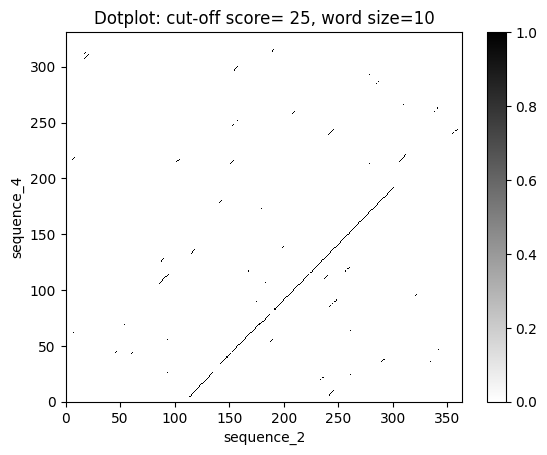

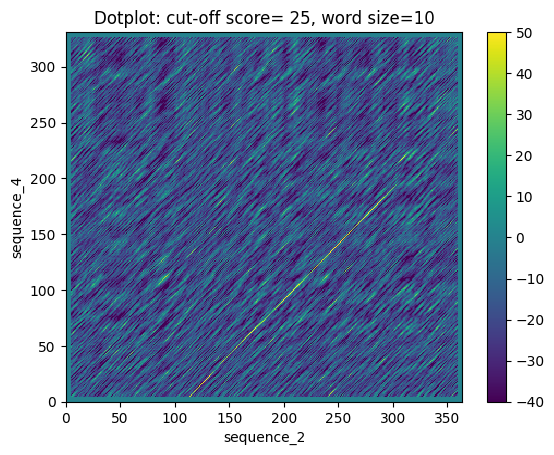

In [62]:
dotplot(sequence_4, sequence_1, cutoff=25, wordsize=10) #change parameters
dotplot(sequence_4, sequence_3, cutoff=25, wordsize=10) #change parameters
dotplot(sequence_4, sequence_2, cutoff=25, wordsize=10) #change parameters

Seq4 and seq1 seem to be roughly the same with the exception that the end of seq4 is similar to the end of seq3 unlike seq1.
Seq4's origin seems to be found in seq2.